In [ ]:
import pandas as pd
import numpy as np

In [40]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("telco-churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [86]:
df.shape

(7032, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
# Pembagian Kolom
target_column = 'Churn'
service_column = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
identity_column = ['Partner','Dependents','gender']
user_account_column = ['Contract','PaperlessBilling','PaymentMethod']

In [42]:
for service in service_column:
  print("Kolom {} :".format(service))
  print(df[service].unique())
  print("")

Kolom PhoneService :
['No' 'Yes']

Kolom MultipleLines :
['No phone service' 'No' 'Yes']

Kolom InternetService :
['DSL' 'Fiber optic' 'No']

Kolom OnlineSecurity :
['No' 'Yes']

Kolom OnlineBackup :
['Yes' 'No']

Kolom DeviceProtection :
['No' 'Yes']

Kolom TechSupport :
['No' 'Yes']

Kolom StreamingTV :
['No' 'Yes']

Kolom StreamingMovies :
['No' 'Yes']



In [46]:
to_binary = ['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']

for i in to_binary:
  df.loc[df[i].isin(['No internet service']), i] = 'No'

In [48]:
to_binary = ['MultipleLines']

for i in to_binary:
  df.loc[df[i].isin(['No phone service']), i] = 'No'

In [49]:
df.replace("No phone service", "no")
df.replace("No internet service", "no")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [44]:
df = df.loc[(df['TotalCharges'].notnull())]
print("Jumlah Missing Values setelah di imputer datanya: ")
print(df.isnull().sum())

Jumlah Missing Values setelah di imputer datanya: 
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(['customerID'], axis=1)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
df.shape

(7032, 20)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = px.pie(values = df['Churn'].value_counts().values, 
             names = df['Churn'].value_counts().index, hole=0.3)
fig.update_layout(
    height=600,
    width= 800,
    showlegend=True,
    #tittle_text="<b>{} xx<b>",
)
fig.update_traces(textposition='inside',
                  textinfo='percent+label')
fig.show()

In [ ]:
def create_hist(col):
  fig = px.histogram( x = df[col].apply(int), color = df['Churn'], histnorm = 'percent',opacity = 0.5)
  fig.update_layout(width = 900,barmode = 'overlay',legend_title_text='Customer Churn')
  fig.update_xaxes(title = '')
  return fig

In [ ]:
def create_bar(col):
  fig = px.histogram(df,x = col,color = 'Churn',histnorm = 'percent')
  fig.update_layout(width = 900,barmode = 'group',legend_title_text='Customer Churn')
  fig.update_xaxes(title = '')
  return fig

In [ ]:
def create_hist_group(col):
  fig = px.histogram(x = df[col].sort_values().astype(str), color = df['Churn'], histnorm = 'percent')#,opacity = 0.5
  fig.update_layout(width = 1200,barmode = 'group',legend_title_text='Customer Churn')
  fig.update_xaxes(title = '')
  return fig

In [51]:
create_bar('gender')

In [52]:
create_bar('SeniorCitizen')

In [53]:
create_bar('Partner')

In [54]:
create_bar('Dependents')

In [55]:
create_bar('PhoneService')

In [56]:
create_bar('MultipleLines')

In [57]:
create_bar('InternetService')

In [39]:
create_bar('OnlineSecurity')

In [58]:
create_bar('StreamingMovies')

In [59]:
create_bar('StreamingTV')

In [60]:
create_bar('Contract')

In [61]:
create_bar('PaperlessBilling')

In [62]:
create_bar('PaymentMethod')

In [ ]:
create_hist('TotalCharges')

In [63]:
create_bar('TotalCharges')

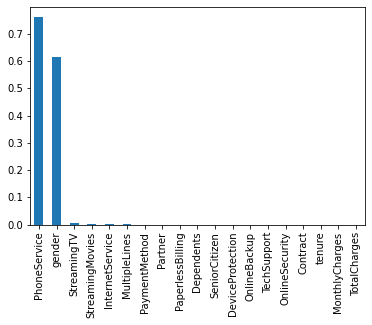

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

label_encoder = LabelEncoder()
df1 = df.copy()

for kolom in df.columns:
  df1[kolom] = label_encoder.fit_transform(df1[kolom])
# Loading data, X : independent var, y : dependent var
X = df1.drop("Churn", axis=1)
Y = df1["Churn"]

chi_scores = chi2(X,Y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
df_corr_pear = df1.corr(method='pearson')
df_corr_spear = df1.corr(method='spearman')
df_corr_kend = df1.corr(method='kendall')
df_corr = pd.DataFrame({"pearson":df_corr_pear['Churn'],
                        "spearman":df_corr_spear['Churn'],
                        "kendall":df_corr_kend['Churn']})
fig = px.imshow(df_corr, text_auto=True, color_continuous_scale=px.colors.sequential.PuBu, width = 1000, height = 600, aspect="auto")
fig.show()

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,990,3700
7039,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,1339,6304
7040,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,137,1265
7041,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,794,1157


In [64]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [65]:
Y.name

'Churn'

In [66]:
df_transformed = df.copy()

label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 

In [67]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,990,3700
7039,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,1339,6304
7040,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,137,1265
7041,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,794,1157


In [68]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X1 = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,Y,stratify = Y,random_state = 25)

In [69]:
X_train

array([[1.        , 1.        , 1.        , ..., 0.33333333, 0.80227416,
        0.9402665 ],
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.97536323,
        0.96707   ],
       [1.        , 0.        , 1.        , ..., 0.33333333, 0.49020846,
        0.84959412],
       ...,
       [1.        , 0.        , 0.        , ..., 0.66666667, 0.28237524,
        0.40756624],
       [1.        , 0.        , 1.        , ..., 0.33333333, 0.99241946,
        0.99954051],
       [0.        , 0.        , 1.        , ..., 1.        , 0.70309539,
        0.91101241]])

In [70]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = df.drop('Churn', axis = 1)
y = df['Churn']
# Splitting train and test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Print according to the expected result
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Prosentase Churn di data Training adalah:
No     0.732461
Yes    0.267539
Name: Churn, dtype: float64
Prosentase Churn di data Testing adalah:
No     0.739477
Yes    0.260523
Name: Churn, dtype: float64


In [71]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

precision_0_scorer=make_scorer(precision_score,pos_label='no')

In [72]:
skf = StratifiedKFold(n_splits = 4,shuffle=True,random_state = 25)

In [73]:
def cv_performance(model,threshold = 0.5):
    tn,fp,fn,tp, prec_1,prec_0,recall_1,recall_0,accuracy,f1_score = [],[],[],[],[],[],[],[],[],[]
    for train,test in skf.split(X,y):
        X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]
        #print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
        model.fit(X_train,y_train)
        #if threshold = 0.5:
        y_pred = np.where(model.predict_proba(X_test)[:,1]>= threshold, 'yes', 'no')
        cm_ravel = confusion_matrix(y_test,y_pred).ravel()
        cr_dict = classification_report(y_test,y_pred,output_dict = True)
        tn.append(cm_ravel[0])
        fp.append(cm_ravel[1])
        fn.append(cm_ravel[2])
        tp.append(cm_ravel[3])
        prec_1.append(cr_dict['yes']['precision'])
        prec_0.append(cr_dict['no']['precision'])
        recall_1.append(cr_dict['yes']['recall'])
        recall_0.append(cr_dict['no']['recall'])
        accuracy.append(cr_dict['accuracy'])
        f1_score.append(cr_dict['yes']['f1-score'])
    df_cv = pd.DataFrame({'tn':tn,'fp':fp,'fn':fn,'fp':fp,'tp':tp,'prec_1':prec_1,'prec_0':prec_0,
             'recall_1':recall_1,'recall_0':recall_0,'accuracy':accuracy,'f1_score':f1_score})
    df_mean = pd.DataFrame({'tn':'','fp':'','fn':'','fp':'','tp':'','prec_1':np.mean(prec_1),'prec_0':np.mean(prec_0),
             'recall_1':np.mean(recall_1),'recall_0':np.mean(recall_0),'accuracy':np.mean(accuracy),'f1_score':np.mean(f1_score)},index = ['mean'])
    df_std_dev = pd.DataFrame({'tn':'','fp':'','fn':'','fp':'','tp':'','prec_1':np.std(prec_1),'prec_0':np.std(prec_0),
             'recall_1':np.std(recall_1),'recall_0':np.std(recall_0),'accuracy':np.std(accuracy),'f1_score':np.std(f1_score)},index = ['std. dev'])
    return pd.concat([df_cv,df_mean,df_std_dev],axis = 0)

In [74]:
from sklearn.linear_model import LogisticRegression #import package
clf = LogisticRegression(random_state=25,max_iter=200) #definisikan model
clf.fit(X_train, y_train) #train model

LogisticRegression(max_iter=200, random_state=25)

In [84]:
y_predict = clf.predict(X_test)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
fig = px.imshow(cm, text_auto=True, color_continuous_scale=px.colors.sequential.haline, width = 500, height = 400, aspect="auto")
fig.show()
#cv_performance(clf)

              precision    recall  f1-score   support

          No       0.73      0.71      0.72      1300
         Yes       0.24      0.27      0.26       458

    accuracy                           0.59      1758
   macro avg       0.49      0.49      0.49      1758
weighted avg       0.61      0.59      0.60      1758



In [91]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state = 25,probability = True)
clf.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=25)

In [98]:
print(classification_report(y_test,clf.predict(X_test)))
cm = confusion_matrix(y_test,clf.predict(X_test))
fig = px.imshow(cm, text_auto=True, color_continuous_scale=px.colors.sequential.haline, width = 500, height = 400, aspect="auto")
fig.show()

              precision    recall  f1-score   support

          No       0.73      0.71      0.72      1300
         Yes       0.24      0.27      0.26       458

    accuracy                           0.59      1758
   macro avg       0.49      0.49      0.49      1758
weighted avg       0.61      0.59      0.60      1758



In [92]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
print(classification_report(y_test,model.predict(X_test)))
cm = confusion_matrix(y_test,model.predict(X_test))
fig = px.imshow(cm, text_auto=True, color_continuous_scale=px.colors.sequential.haline, width = 500, height = 400, aspect="auto")
fig.show()

              precision    recall  f1-score   support

          No       0.74      0.81      0.77      1300
         Yes       0.25      0.18      0.21       458

    accuracy                           0.65      1758
   macro avg       0.49      0.50      0.49      1758
weighted avg       0.61      0.65      0.63      1758



In [94]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 25)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=25)

In [95]:
print(classification_report(y_test,clf.predict(X_test)))
cm = confusion_matrix(y_test,clf.predict(X_test))
fig = px.imshow(cm, text_auto=True, color_continuous_scale=px.colors.sequential.haline, width = 500, height = 400, aspect="auto")
fig.show()

              precision    recall  f1-score   support

          No       0.73      0.71      0.72      1300
         Yes       0.24      0.27      0.26       458

    accuracy                           0.59      1758
   macro avg       0.49      0.49      0.49      1758
weighted avg       0.61      0.59      0.60      1758



In [96]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 9,random_state = 25)
xgb.fit(X_train,y_train)

XGBClassifier(max_depth=9, random_state=25)

In [97]:
print(classification_report(y_test,xgb.predict(X_test)))
cm = confusion_matrix(y_test,xgb.predict(X_test))
fig = px.imshow(cm, text_auto=True, color_continuous_scale=px.colors.sequential.haline, width = 500, height = 400, aspect="auto")
fig.show()

              precision    recall  f1-score   support

          No       0.74      0.97      0.84      1300
         Yes       0.30      0.03      0.06       458

    accuracy                           0.73      1758
   macro avg       0.52      0.50      0.45      1758
weighted avg       0.63      0.73      0.64      1758

